In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data.csv',header=None)

In [4]:
df.head()

,0
0,0.467053
1,-1.066558
2,1.946904
3,-0.956927
4,-1.556807


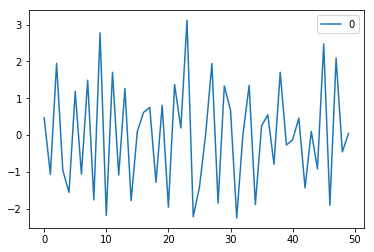

In [5]:
df[:50].plot()
plt.show()

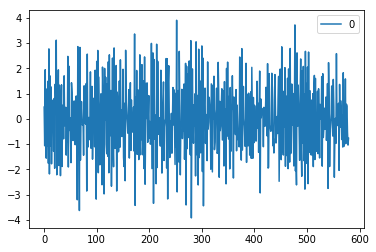

In [6]:
df.plot()
plt.show()

In [7]:
cut = 550
end = len(df)

In [8]:
X=df.as_matrix().squeeze()[:cut]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [9]:
Y=df.as_matrix().squeeze()[cut:]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


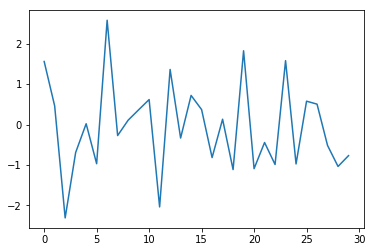

In [10]:
plt.plot(Y)

In [11]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 自相关偏相关系数图

https://en.wikipedia.org/wiki/Autocorrelation

有的白噪声检验就是直接检验“所有”自相关系数是不是显著不等于0

D:\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


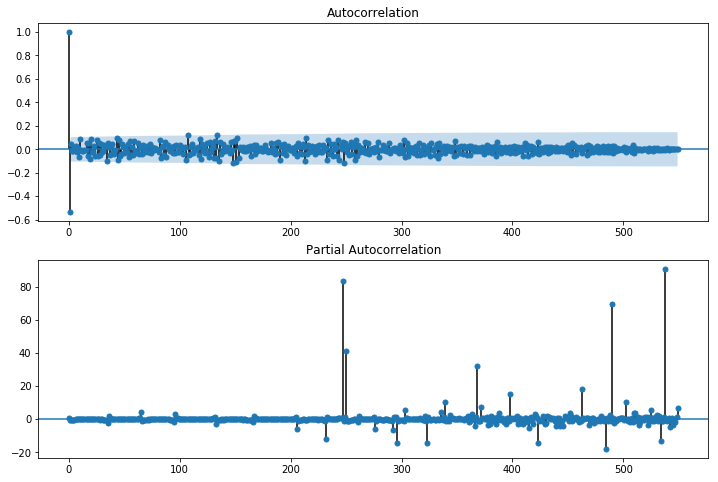

In [12]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(X, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(X, ax=ax2)


# 白噪声检验

Ljung–Box test：https://en.wikipedia.org/wiki/Ljung%E2%80%93Box_test

In [13]:
from statsmodels.stats import diagnostic as diag


In [14]:
lbvalue, pvalue = diag.acorr_ljungbox(X)

In [15]:
pvalue

array([8.11571679e-36, 7.28962486e-35, 6.66110737e-34, 4.99511300e-33,
       3.07106292e-32, 1.52510651e-31, 6.98674080e-31, 3.41192804e-30,
       4.53505274e-30, 2.65614485e-30, 1.10990372e-29, 4.03099515e-29,
       1.47051977e-28, 5.35751275e-28, 1.87462004e-27, 2.81612546e-27,
       3.47623214e-27, 5.43891270e-27, 2.66131242e-27, 1.24611297e-27,
       3.38885231e-27, 8.73989812e-27, 1.98605445e-26, 2.43432417e-26,
       1.43149288e-26, 1.59113278e-26, 2.01967100e-26, 2.86146372e-26,
       5.00775219e-26, 1.13733619e-25, 2.77065968e-25, 5.29708525e-25,
       1.10414525e-24, 2.17267627e-25, 2.60129739e-25, 5.98335331e-25,
       8.51352163e-25, 1.62146735e-24, 2.43125076e-24, 4.88254827e-24])

各个$h$取值对应的p值均十分接近0（小于0.01）,拒绝白噪声假设。

# 搜索最优ARMA参数

拟合ARMA模型：https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model



In [16]:
m,n = 6,6
aic_mat = np.ones((m,n)) * np.inf
bic_mat = np.ones((m,n)) * np.inf

setting 0 0
setting 0 1
[-1.58009922e-05 -9.99999981e-01]
aic: 1574.676089188215 bic: 1587.6058440228944


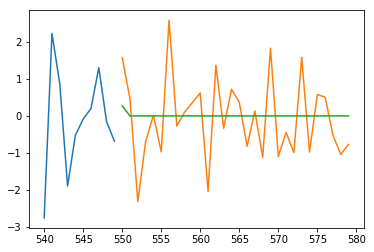

setting 0 2
invaild setting skip
setting 0 3
invaild setting skip
setting 0 4
invaild setting skip
setting 0 5
invaild setting skip
setting 1 0
[-4.40398977e-04 -5.30605391e-01]
aic: 1815.5810081154484 bic: 1828.5107629501279


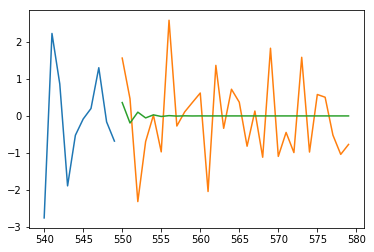

setting 1 1
[-1.90151686e-05 -9.00941875e-02 -9.99954975e-01]
aic: 1572.2227585262476 bic: 1589.4624316391537


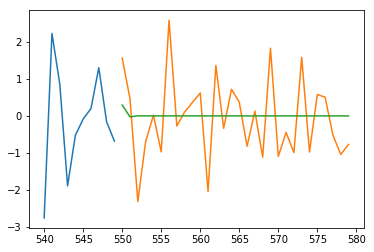

setting 1 2


D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


[ 1.70261638e-05  8.79387019e-01 -1.97580416e+00  9.75824262e-01]
aic: 1558.7580594035378 bic: 1580.3076507946703


D:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


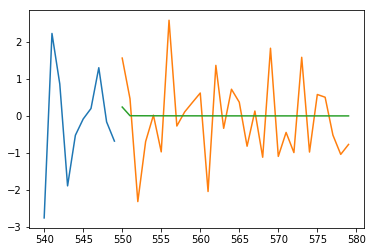

setting 1 3
[-1.50861828e-05 -9.16105056e-01 -1.79907778e-01 -8.99621183e-01
  7.95695841e-02]
aic: 1575.7224916995626 bic: 1601.5820013689217


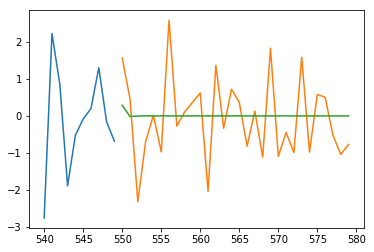

setting 1 4


D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)


[-1.46660029e-05 -8.99946433e-01 -1.97687179e-01 -9.27396857e-01
  7.41710119e-02  5.09556533e-02]
aic: 1576.4616720910622 bic: 1606.6311000386477


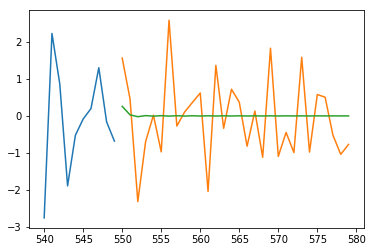

setting 1 5
[-1.48161175e-05 -9.16293806e-01 -1.85917425e-01 -9.40781497e-01
  3.15841778e-02  3.99768861e-02  5.51863687e-02]
aic: 1577.0488371104875 bic: 1611.5281833362997


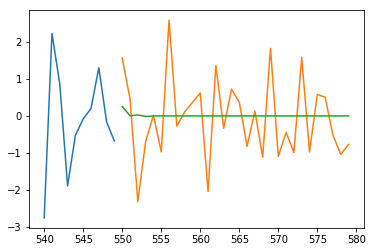

setting 2 0
[-1.52423016e-05 -7.06172432e-01 -3.29883435e-01]
aic: 1754.068018371208 bic: 1771.307691484114


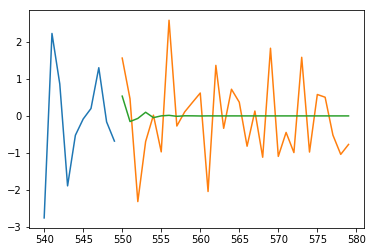

setting 2 1
[-1.51148397e-05 -9.25893847e-02 -2.98618880e-02 -9.99927379e-01]
aic: 1573.7298442776448 bic: 1595.2794356687773


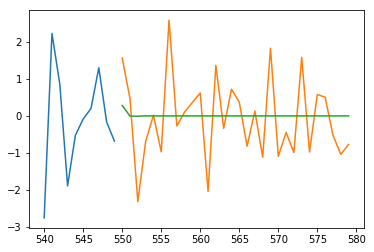

setting 2 2
[-1.53031042e-05 -8.13676041e-01 -6.47421505e-02 -2.76094344e-01
 -7.23905619e-01]
aic: 1576.2223066363629 bic: 1602.081816305722


D:\anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


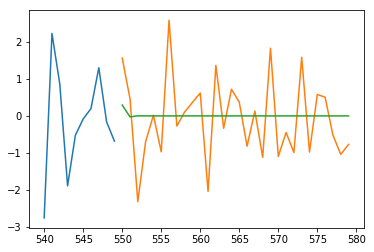

setting 2 3
[ 2.50274864e-05 -9.26648888e-02  8.72557083e-01 -1.00170368e+00
 -9.67011967e-01  9.68716525e-01]
aic: 1562.6088444208303 bic: 1592.7782723684159


D:\anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


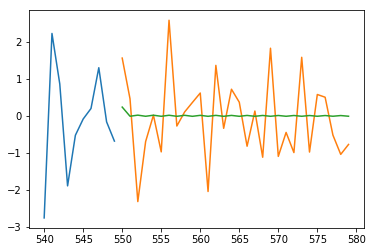

setting 2 4
[-1.76425584e-05 -1.33239225e+00 -9.83588064e-01  2.46331656e-01
 -3.59594365e-01 -9.71651662e-01  8.49143920e-02]
aic: 1574.3704787688887 bic: 1608.8498249947008


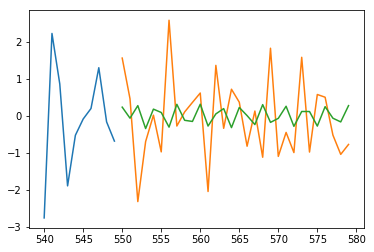

setting 2 5
[-1.73230162e-05 -1.33359122e+00 -9.83146181e-01  2.46106074e-01
 -4.13948869e-01 -9.89654180e-01  1.03123289e-01  5.43736915e-02]
aic: 1574.9467142144015 bic: 1613.73597871844


D:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


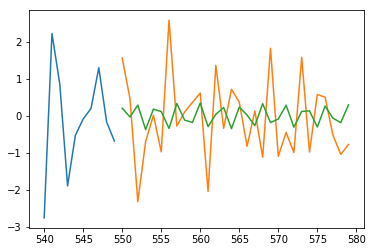

setting 3 0
[-2.58975626e-04 -7.90016342e-01 -5.08959765e-01 -2.53515437e-01]
aic: 1719.5172381100565 bic: 1741.066829501189


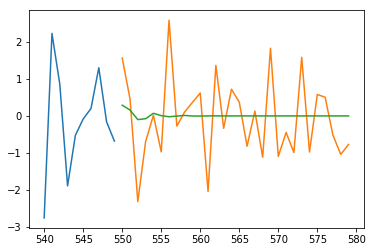

setting 3 1
[-1.57297217e-05 -9.44877448e-02 -3.53737555e-02 -5.65035436e-02
 -9.99982391e-01]
aic: 1573.9680452510036 bic: 1599.8275549203627


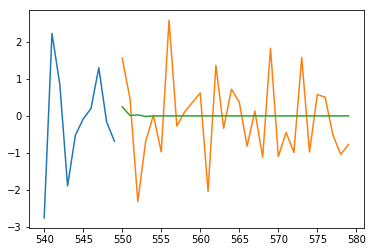

setting 3 2
[-1.48330474e-05 -9.73482879e-01 -1.13107488e-01 -4.34341200e-02
 -1.18467698e-01 -8.81519525e-01]
aic: 1577.0151487039616 bic: 1607.184576651547


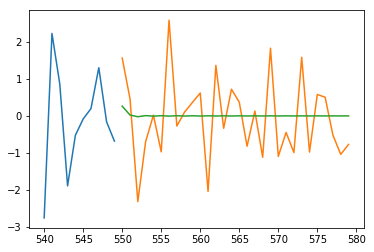

setting 3 3
[-1.42689011e-05 -1.88786354e+00 -1.14127458e+00 -9.00522660e-02
  8.12157480e-01 -8.12341060e-01 -9.99816367e-01]
aic: 1575.2590996320291 bic: 1609.7384458578413


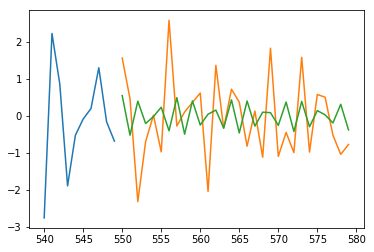

setting 3 4


D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


invaild setting skip
setting 3 5
[-1.67994698e-05 -1.41390566e+00 -1.43917060e+00 -9.18134932e-01
  3.22664969e-01 -3.27850998e-03 -5.45383717e-01 -8.65468748e-01
  9.38060343e-02]
aic: 1578.0943709486287 bic: 1621.1935537308939


D:\anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


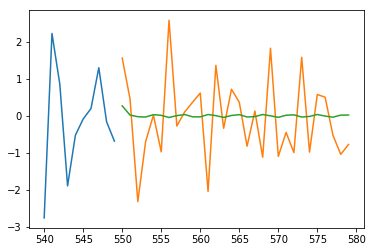

setting 4 0
[-5.49703697e-04 -8.49752914e-01 -6.28889235e-01 -4.39358637e-01
 -2.34656585e-01]
aic: 1690.3383107784225 bic: 1716.1978204477816


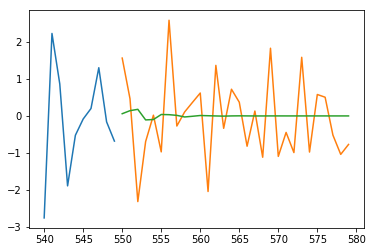

setting 4 1
[-1.46436823e-05 -9.76660342e-02 -3.74207477e-02 -6.15416388e-02
 -5.24904084e-02 -9.99955903e-01]
aic: 1574.451572167527 bic: 1604.6210001151126


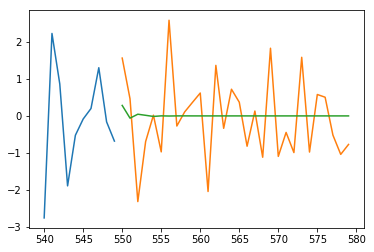

setting 4 2
[ 1.36975297e-05  8.46896575e-01  5.19459710e-02 -2.72481712e-02
  7.07621923e-03 -1.97308679e+00  9.73086799e-01]
aic: 1563.9574984295032 bic: 1598.4368446553153


D:\anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


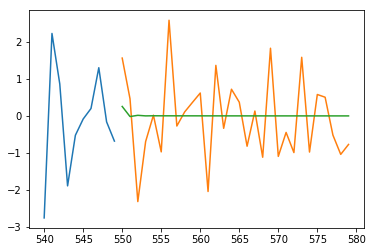

setting 4 3
[-1.81215572e-05  3.53402762e-01 -8.93672631e-01 -1.14178671e-01
 -4.36877496e-02 -1.45124819e+00  1.36547498e+00 -9.14226785e-01]
aic: 1573.6669144572418 bic: 1612.4561789612803


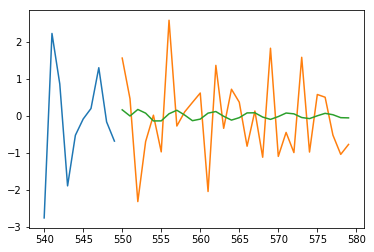

setting 4 4


D:\anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


[ 1.54865242e-05  1.34304307e+00 -1.35996007e+00  7.97609261e-01
  5.60772543e-02 -2.47411507e+00  2.95958016e+00 -2.46091920e+00
  9.75454240e-01]
aic: 1561.5418497785251 bic: 1604.6410325607903


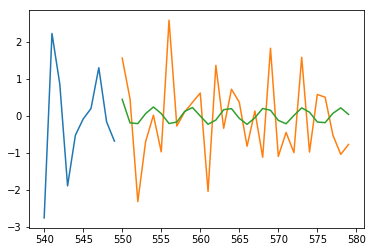

setting 4 5
[ 3.41022003e-05  1.28860366e-01  2.24041582e-04  4.55672711e-01
  1.66570187e-01 -1.26441376e+00  2.24805667e-01 -4.87493037e-01
  3.58633964e-01  1.68467167e-01]
aic: 1569.759577165744 bic: 1617.1686782262357


D:\anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


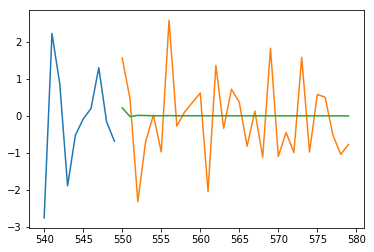

setting 5 0
[-6.26759629e-04 -8.95801212e-01 -7.15155739e-01 -5.62492986e-01
 -4.01242798e-01 -1.95403050e-01]
aic: 1670.9555995910464 bic: 1701.125027538632


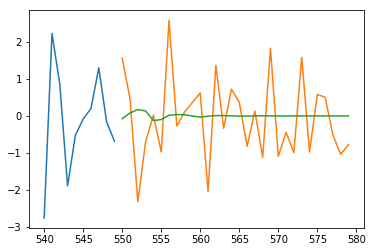

setting 5 1
[-1.40877501e-05 -9.83849417e-02 -3.82528971e-02 -6.20452166e-02
 -5.37748639e-02 -1.25852426e-02 -9.99919234e-01]
aic: 1576.3647508711613 bic: 1610.8440970969734


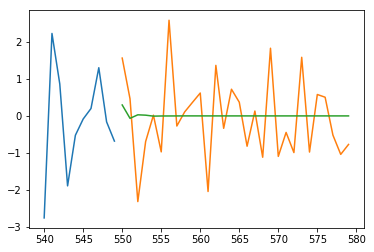

setting 5 2
[-1.35734496e-05 -9.68925010e-01 -1.23841582e-01 -9.48763770e-02
 -1.08316362e-01 -6.60981350e-02 -1.28215556e-01 -8.71400260e-01]
aic: 1577.537501138056 bic: 1616.3267656420946


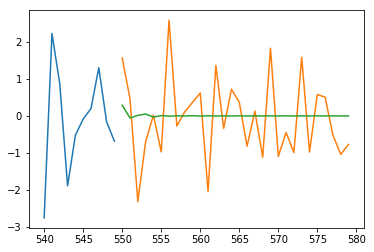

setting 5 3
[-1.42452248e-05 -1.37000111e+00 -5.28396074e-01 -1.43268953e-01
 -1.40156811e-01 -8.17619819e-02  2.74730931e-01 -9.05890491e-01
 -3.68840440e-01]
aic: 1579.3777056776748 bic: 1622.47688845994


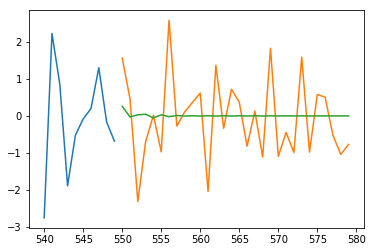

setting 5 4
invaild setting skip
setting 5 5
[-1.70816570e-05 -1.51120984e+00 -1.13740016e+00 -1.47241047e+00
 -1.08876881e+00 -1.38099108e-01  4.21372398e-01 -4.21938748e-01
  3.61190704e-01 -4.54381245e-01 -9.06206622e-01]
aic: 1577.3163893906121 bic: 1629.0354087293304


D:\anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


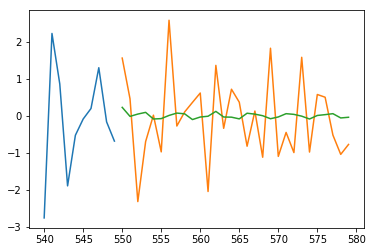

In [17]:
for i in range(m):
    for j in range(n):
        print(f'setting {i} {j}')
        if i == 0 and  j == 0:
            continue
        try:
            arma_mod = sm.tsa.ARMA(X, (i,j)).fit(disp=False)
        except (ValueError,np.linalg.LinAlgError):
            print('invaild setting skip')
            continue
        
        print(arma_mod.params)
        print(f'aic: {arma_mod.aic} bic: {arma_mod.bic}')
        aic_mat[i,j] = arma_mod.aic
        bic_mat[i,j] = arma_mod.bic
        
        plt.plot(np.arange(cut-10,cut),X[-10:])
        plt.plot(np.arange(cut,end),Y)
        plt.plot(np.arange(cut,end),arma_mod.predict(start=cut,end=end-1))
        plt.show()

利用BIC原则：https://en.wikipedia.org/wiki/Bayesian_information_criterion

In [18]:
bic_mat

array([[          inf, 1587.60584402,           inf,           inf,
                  inf,           inf],
       [1828.51076295, 1589.46243164, 1580.30765079, 1601.58200137,
        1606.63110004, 1611.52818334],
       [1771.30769148, 1595.27943567, 1602.08181631, 1592.77827237,
        1608.84982499, 1613.73597872],
       [1741.0668295 , 1599.82755492, 1607.18457665, 1609.73844586,
                  inf, 1621.19355373],
       [1716.19782045, 1604.62100012, 1598.43684466, 1612.45617896,
        1604.64103256, 1617.16867823],
       [1701.12502754, 1610.8440971 , 1616.32676564, 1622.47688846,
                  inf, 1629.03540873]])

In [19]:
np.unravel_index(bic_mat.argmin(), bic_mat.shape)

(1, 2)

所以最优模型是ARMA(1,2),可以注意ARMA(1,2)的条件期望和真实结果一点都不像，这是因为条件期望作为预测与其说是预测真实曲线什么样子，
不如说是根据所拟合的模型对后面所可能产生的各种曲线的概率分布的一种属性的描述，因为移除了估计的波动性所以肯定会振幅越来越小趋于均值。

可以看另外两种图了解所估计的统计模型之性质，一个是只预测一步，把测试数据也加进来。一个是看看这个模型的模拟结果。

In [20]:
arma_model = arma_mod = sm.tsa.ARMA(X, (1,2)).fit(disp=False)

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [21]:
arma_model.summary()

D:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
D:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  550
Model:                     ARMA(1, 2)   Log Likelihood                -774.379
Method:                       css-mle   S.D. of innovations              0.980
Date:                Sun, 05 Aug 2018   AIC                           1558.758
Time:                        08:53:32   BIC                           1580.308
Sample:                             0   HQIC                          1567.179
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.703e-05   6.26e-05      0.272      0.786      -0.000       0.000
ar.L1.y        0.8794      0.023     38.962      0.000       0.835       0.924
ma.L1.y       -1.9758        nan        nan        nan         nan         nan
ma.L2.y        0.9758        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1372           +0.0000j            1.1372            0.0000
MA.1            1.0009           +0.0000j            1.0009            0.0000
MA.2            1.0239           +0.0000j            1.0239            0.0000
-----------------------------------------------------------------------------
"""

In [22]:
arma_model.sigma2

0.9612478708480754

模型形式为

$$
\begin{align*}
y_t &= 0.8857 y_{t-1} -1.9648 \epsilon_{t-1} + 0.9648 \epsilon_{t-2} + \epsilon_t \\
\epsilon_t &\sim N(0,0.983^2) \quad \text{i.i.d}
\end{align*}
$$

In [23]:
arma_model.sigma2

0.9612478708480754

In [24]:
arma_model.params

array([ 1.70261638e-05,  8.79387019e-01, -1.97580416e+00,  9.75824262e-01])

In [25]:
c ,phi1, theta1, theta2 = arma_model.params
sigma = np.sqrt(arma_model.sigma2)

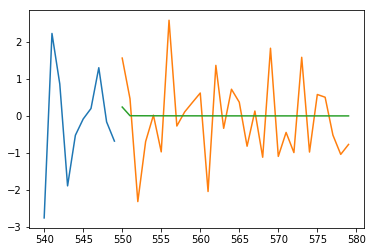

In [26]:
plt.plot(np.arange(cut-10,cut),X[-10:])
plt.plot(np.arange(cut,end),Y)
plt.plot(np.arange(cut,end),arma_mod.predict(start=cut,end=end-1))
plt.show()

In [27]:
epsilon = np.random.rand(30) * sigma
epsilon

array([0.32785051, 0.161839  , 0.31178815, 0.36002051, 0.80017836,
       0.38447858, 0.42408158, 0.24038303, 0.7152639 , 0.10436438,
       0.49374806, 0.49948967, 0.13641902, 0.51365548, 0.09899136,
       0.71261576, 0.38950149, 0.43869848, 0.11687837, 0.69956464,
       0.12959402, 0.61707135, 0.130719  , 0.47377013, 0.18362246,
       0.33182906, 0.78274552, 0.5926662 , 0.31543741, 0.69704319])

In [28]:
y = np.zeros(30)
y[0] = np.nan

In [29]:
for i in range(2,30):
    y[i] = phi1 * y[i-1] + theta1 * epsilon[i-1] + theta2 * epsilon[i-2] + epsilon[i]

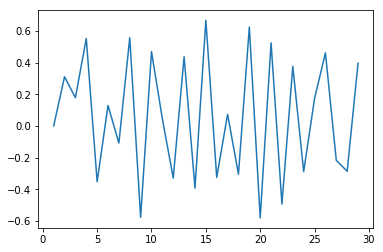

In [30]:
plt.plot(y)
plt.show()

In [31]:
(X - arma_model.predict())[-10:]

D:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([-1.41267676,  0.68998689,  1.60468684, -0.16764006, -0.72368393,
       -0.87912866, -0.75500102,  0.4885038 ,  0.37209072, -0.27758129])

In [44]:
arma_model.resid.copy()[-10:]

array([-1.33005437,  0.74631407,  1.67392425, -0.06970807, -0.63033905,
       -0.80003388, -0.69213789,  0.53824807,  0.43174609, -0.21063154])

In [47]:
sim_len = 20

epsilon = np.r_[arma_model.resid.copy(),np.random.randn(sim_len)*sigma]
sim_y = np.r_[X.copy(),np.zeros(sim_len)]

In [51]:
epsilon[-30:]

array([-1.33005437,  0.74631407,  1.67392425, -0.06970807, -0.63033905,
       -0.80003388, -0.69213789,  0.53824807,  0.43174609, -0.21063154,
        0.65159504, -1.7261165 , -0.77077226,  1.06771735, -0.02567705,
       -0.73370081,  0.69549986,  0.2632146 ,  0.54264774,  0.09120499,
        0.43351343, -1.06298714, -2.46468959, -1.04095089,  0.46746924,
       -0.0445376 ,  0.23118488, -1.56705207,  0.55800462, -0.56740003])

In [52]:
for i in range(cut,cut+sim_len):
    sim_y[i] = phi1 * sim_y[i-1] + theta1 * epsilon[i-1] + theta2 * epsilon[i-2] + epsilon[i]

In [55]:
Y[:sim_len].shape

(20,)

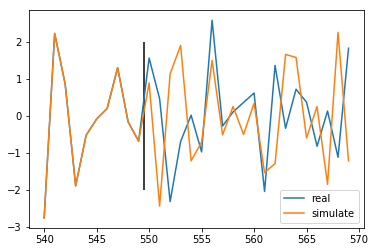

In [53]:
idx = np.arange(cut-10,cut+sim_len)
plt.plot(idx,np.r_[X[-10:],Y[:sim_len]],label='real')
plt.plot(idx,sim_y[-sim_len-10:],label='simulate')
plt.vlines(cut-0.5,-2,2)
plt.legend()
plt.show()

这只是一次模拟，不同次模拟会模拟出不同的曲线，条件期望预测只是对这些曲线的随机性质的描述而已。